In [10]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
sns.set()

In [36]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

In [11]:
data = pd.read_excel("../../Data/Simulation Results/UK Model/backwards tracing pars frozen.xlsx", index_col = 0)
days_simulated = 25

In [12]:
data

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,prob_has_trace_app,test_before_propagate_tracing,test_delay_mean,probable_infections_need_test,number_of_days_to_trace_backwards,...,15,16,17,18,19,20,21,22,23,24
0,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,4,...,1177,1386,1607,1849,2136,2484,2853,3263,3737,4288
1,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,...,1221,1399,1621,1885,2182,2499,2863,3275,3729,4231
2,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,...,1185,1391,1615,1890,2174,2531,2883,3332,3819,4424
3,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,7,...,1209,1406,1636,1903,2194,2503,2834,3290,3701,4178
4,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,...,1283,1494,1723,1994,2285,2615,2970,3372,3812,4375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,...,1183,1388,1607,1882,2190,2539,2898,3333,3772,4308
996,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,...,1099,1299,1496,1729,1993,2297,2637,2994,3414,3874
997,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,...,1498,1741,2048,2343,2698,3113,3550,4049,4566,5213
998,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,...,1321,1569,1838,2106,2464,2845,3309,3784,4350,5027


In [13]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts = data[infection_counts]

Text(0.5, 1.0, 'Total Infected')

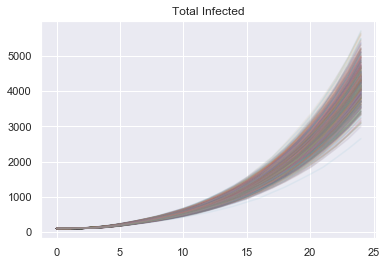

In [14]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

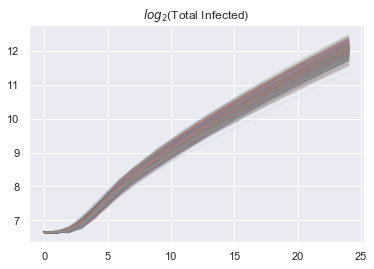

In [15]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

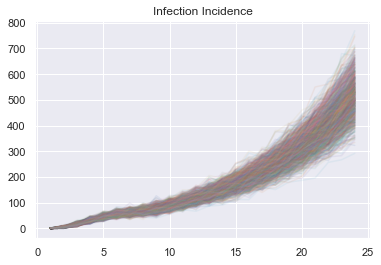

In [16]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

Text(0.5, 1.0, 'Infection Incidence (10 epidemics)')

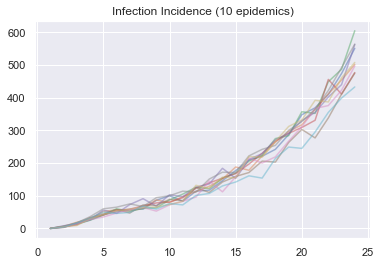

In [17]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.5)
plt.title("Infection Incidence (10 epidemics)")

Text(0.5, 1.0, '$Log_e$(Case Incidence) (14 epidemics)')

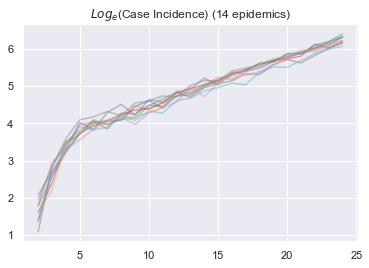

In [18]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
#plt.savefig("Figures/Log_case_incidence.png")

We can see the variance begins to increase for the exponentially decaying epidemcis as they near 0. In order to get good estimation for the epidemics, we icnrease the starting number of infections. In this experiment, we start with 5000 infected, let the process run for 10 days, and then estimated the growth rate using days 10-30.

In [19]:
log_diff = infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe = pd.DataFrame(data_set_up)

C:\Users\mfyles\OneDrive - The Alan Turing Institute\Documents\GitHub\household-contact-tracing\env\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     859.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           2.92e-13
Time:                        10:46:03   Log-Likelihood:                 18.924
No. Observations:                  15   AIC:                            -33.85
Df Residuals:                      13   BIC:                            -32.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9973      0.077     38.846      0.0

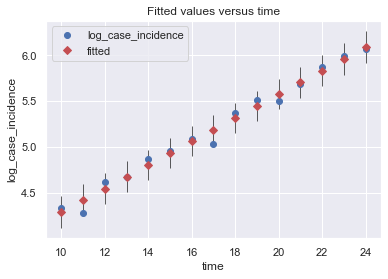

In [20]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe)
model = sma.OLS(y, X)
res = model.fit()
print(res.summary())
fig = sm.graphics.regressionplots.plot_fit(res, 1)
print(f"doublign time = {m.log(2)/res.params[1]}")

In [21]:
data_subset = infection_counts

In [22]:
growth_rates = []
for _ in range(data_subset.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.RLM(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [23]:
x = pd.Series(growth_rates) # 200 values
#x = x[x.between(x.quantile(.05), x.quantile(.95))] # without outliers

Text(0.5, 1.0, 'Distribution of Growth Rates')

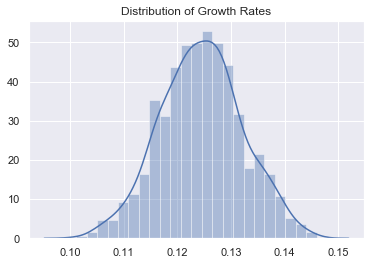

In [24]:
sns.distplot(x)
plt.title("Distribution of Growth Rates")

In [25]:
data_pars = data[data.columns[0:11]]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

<ipython-input-25-fbedfbebcb19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pars["growth_rate"] = growth_rate_series


In [26]:
data_pars

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,prob_has_trace_app,test_before_propagate_tracing,test_delay_mean,probable_infections_need_test,number_of_days_to_trace_backwards,backwards_tracing_time_limit,growth_rate
0,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,4,25,0.130774
1,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,31,0.129191
2,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,31,0.133001
3,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,7,27,0.124136
4,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,25,0.120391
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,6,9,0.131118
996,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,9,0.125600
997,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,11,24,0.123322
998,0.229609,0.3,0.8,2,0.3,0,True,1.52,False,3,30,0.135054


In [27]:
y, X = dmatrices('growth_rate ~ number_of_days_to_trace_backwards + number_of_days_to_trace_backwards**2', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
res = model_2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     351.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           2.27e-67
Time:                        10:46:14   Log-Likelihood:                 3607.5
No. Observations:                1000   AIC:                            -7211.
Df Residuals:                     998   BIC:                            -7201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [28]:
y, X = dmatrices('growth_rate ~  number_of_days_to_trace_backwards + I(number_of_days_to_trace_backwards**2)', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
res = model_2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     234.3
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.96e-84
Time:                        10:46:14   Log-Likelihood:                 3649.4
No. Observations:                1000   AIC:                            -7293.
Df Residuals:                     997   BIC:                            -7278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

<ipython-input-36-e3933c76672f>:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))
<ipython-input-36-e3933c76672f>:5: RuntimeWarning: invalid value encountered in multiply
  return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))
<ipython-input-36-e3933c76672f>:2: RuntimeWarning: invalid value encountered in sign
  return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))


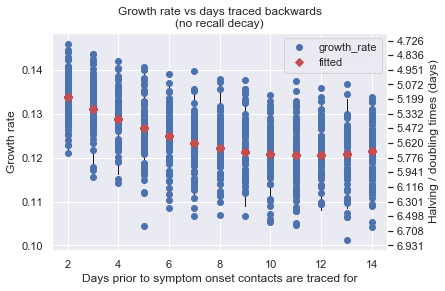

In [40]:
fig, ax = plt.subplots()

sm.graphics.regressionplots.plot_fit(res, "number_of_days_to_trace_backwards", ax = ax)

y_vals = np.linspace(0.15, 0.1, 16)

ax2 = ax.secondary_yaxis("right", functions=(growth_rate_to_doubling_time, doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(y_vals), minor = False)

plt.title("Growth rate vs days traced backwards\n(no recall decay)")
plt.xlabel("Days prior to symptom onset contacts are traced for")
plt.ylabel("Growth rate")
ax2.set_ylabel("Halving / doubling times (days)")
plt.savefig("../../Figures/UK Model/days_prior_to_symptom_onset_perfect_recall.svg", bbox_inches='tight')
plt.savefig("../../Figures/UK Model/days_prior_to_symptom_onset_perfect_recall.png", bbox_inches='tight')

## Residuals vs Fitted Value

There doesn't appear to be any systematic deviation from our predicted value

Text(0, 0.5, 'Residual')

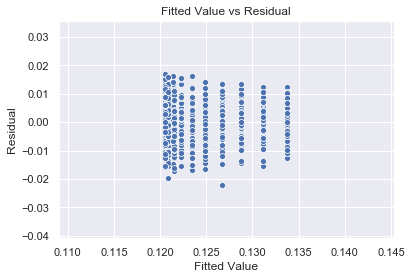

In [41]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

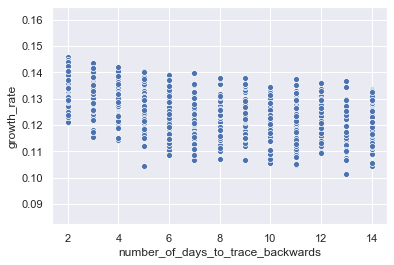

In [42]:
sns.scatterplot(data_pars["number_of_days_to_trace_backwards"], data_pars["growth_rate"])

## Residual Distribution

Text(0.5, 1.0, 'Distribution of the residuals')

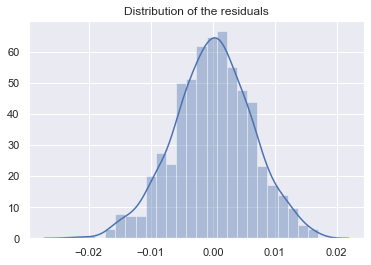

In [32]:
sns.distplot(res.resid)
plt.title("Distribution of the residuals")

Sort of normally distributed

## Normality of residuals tests

In [33]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
lzip(name, test)

[('Jarque-Bera', 2.631114621315461),
 ('Chi^2 two-tail prob.', 0.2683247413232379),
 ('Skew', -0.12521968697059296),
 ('Kurtosis', 3.0206608540849094)]

## Heteroskedasticity tests

We have strong heteroscedasticity in our data

In [34]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 7.134621723627221),
 ('p-value', 0.028231670556942354),
 ('f-value', 3.5821663309506215),
 ('f p-value', 0.028173960030484984)]